## Robust Scaler Decision Tree Classifier

The notebook is iedntical to the other Decision Tree Tlassifier except the Robuts Scaler.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_dummies.csv')

In [3]:
df= df.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168018 entries, 0 to 168017
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Month       168018 non-null  int64
 1   DayofMonth  168018 non-null  int64
 2   ArrTime     168018 non-null  int64
 3   DepDelay    168018 non-null  int64
 4   Distance    168018 non-null  int64
 5   DayofWeek   168018 non-null  int64
 6   Dest_ATL    168018 non-null  int64
 7   Dest_DEN    168018 non-null  int64
 8   Dest_DFW    168018 non-null  int64
 9   Dest_LAX    168018 non-null  int64
 10  Dest_ORD    168018 non-null  int64
dtypes: int64(11)
memory usage: 14.1 MB


In [1]:
# value counts for each feature
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

NameError: name 'df' is not defined

In [6]:
# set x and y
X = df.drop(columns=['DepDelay'], axis=1)
y= df['DepDelay']

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, train_size=.8, random_state=42)

In [8]:
#lasso for fun
# LASSO: sum of actual minus predicted squared plus
#takes absolute value of the  weighted feature with a lambda penalty. 
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [9]:
print('Training r^2:', lasso.score(X_train, y_train))
print('Test r^2:', lasso.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test)))

Training r^2: 0.012976426265727037
Test r^2: 0.011371839624029656
Training MSE: 0.21779579272532543
Test MSE: 0.21751229371306033


In [10]:
#ridge for fun
#RIDGE: sum of actual minus predicted squared plus
#squares weighted feature with lambda penalty. 
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [11]:
print('Training r^2:', ridge.score(X_train, y_train))
print('Test r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test)))

Training r^2: 0.01862462313268476
Test r^2: 0.018814315126704617
Training MSE: 0.21654946634889083
Test MSE: 0.21587484296830867


In [12]:
#using robust scaler since data is usually has skew
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

RobustScaler()

In [13]:
scaler_X_train = robust_scaler.transform(X_train)
scaler_X_test = robust_scaler.transform(X_test)

### Baseline DTC 

In [14]:
#decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(scaler_X_train, y_train)

DecisionTreeClassifier()

In [15]:
df_col = list(df.columns)
df_col.remove('DepDelay')

##### Feature Importance 

In [16]:
#features are wegithed the same as standard scaler
df_feat = pd.DataFrame(dtc.feature_importances_, index=df_col, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feat

,feature importance
ArrTime,0.340217
Distance,0.223944
DayofMonth,0.181197
Month,0.125923
DayofWeek,0.103402
Dest_DFW,0.006642
Dest_ORD,0.006586
Dest_DEN,0.006548
Dest_LAX,0.003621
Dest_ATL,0.001922


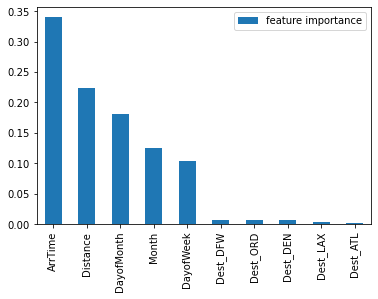

In [17]:
df_feat.plot(kind='bar');

##### Model Train

In [18]:
dtc_pred_train = dtc.predict(scaler_X_train)

In [19]:
print(classification_report(y_train, dtc_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       1.00      1.00      1.00     44183
       Delay       1.00      1.00      1.00     90231

    accuracy                           1.00    134414
   macro avg       1.00      1.00      1.00    134414
weighted avg       1.00      1.00      1.00    134414



In [20]:
print('Mean Absolute Error:', mean_absolute_error(y_train, dtc_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, dtc_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, dtc_pred_train)))

Mean Absolute Error: 0.0002380704390911661
Mean Squared Error: 0.0002380704390911661
Root Mean Squared Error: 0.015429531395708882


##### Model Test

In [21]:
dtc_pred_test = dtc.predict(scaler_X_test)

In [22]:
#no change in outcome with robust scaler
print(classification_report(y_test, dtc_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.44      0.46      0.45     10983
       Delay       0.73      0.72      0.72     22621

    accuracy                           0.63     33604
   macro avg       0.59      0.59      0.59     33604
weighted avg       0.64      0.63      0.63     33604



In [23]:
print('Mean Absolute Error:', mean_absolute_error(y_test, dtc_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, dtc_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dtc_pred_test)))

Mean Absolute Error: 0.3670991548625164
Mean Squared Error: 0.3670991548625164
Root Mean Squared Error: 0.6058870809503338


##### Confusion Matrix

In [24]:
base_cnf_matrix = confusion_matrix(y_test, dtc_pred_test)
base_cnf_matrix

array([[ 5009,  5974],
       [ 6362, 16259]], dtype=int64)

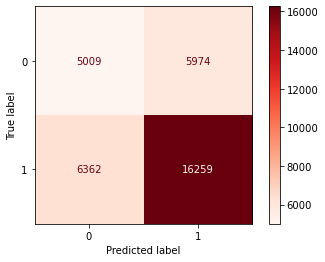

In [25]:
plot_confusion_matrix(dtc, scaler_X_test, y_test,
                      cmap=plt.cm.Reds)
plt.show()

### Random Search

In [26]:
param_grid={
    'criterion':['gini', 'entropy'],
    'random_state': [1,20, 42, 100 ],
    'max_depth':[5,10,20,30,40,50,60,70],
    'min_samples_split':[5,10,20,25,30,40,50],
    'min_samples_leaf':[1,100,200,300,400,500]
            }

In [27]:
dtc_rand_search = RandomizedSearchCV(dtc, param_grid)

##### Model Train

In [28]:
dtc_rand_search.fit(scaler_X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 60,
                                                      70],
                                        'min_samples_leaf': [1, 100, 200, 300,
                                                             400, 500],
                                        'min_samples_split': [5, 10, 20, 25, 30,
                                                              40, 50],
                                        'random_state': [1, 20, 42, 100]})

In [29]:
dtc_rand_search.best_params_

{'random_state': 1,
 'min_samples_split': 20,
 'min_samples_leaf': 300,
 'max_depth': 60,
 'criterion': 'gini'}

In [30]:
dtc_rs_pred_train = dtc_rand_search.predict(scaler_X_train)

In [31]:
#again consistent with standard scaler
print(classification_report(y_train, dtc_rs_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.57      0.13      0.22     44183
       Delay       0.69      0.95      0.80     90231

    accuracy                           0.68    134414
   macro avg       0.63      0.54      0.51    134414
weighted avg       0.65      0.68      0.61    134414



In [32]:
print('Mean Absolute Error:', mean_absolute_error(y_train, dtc_rs_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, dtc_rs_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, dtc_rs_pred_train)))

Mean Absolute Error: 0.3177124406683828
Mean Squared Error: 0.3177124406683828
Root Mean Squared Error: 0.5636598625664088


##### Model Test

In [33]:
dtc_rs_pred_test = dtc_rand_search.predict(scaler_X_test)

In [34]:
print(classification_report(y_test, dtc_rs_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.54      0.13      0.21     10983
       Delay       0.69      0.95      0.80     22621

    accuracy                           0.68     33604
   macro avg       0.61      0.54      0.50     33604
weighted avg       0.64      0.68      0.61     33604



In [35]:
print('Mean Absolute Error:', mean_absolute_error(y_test, dtc_rs_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, dtc_rs_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dtc_rs_pred_test)))

Mean Absolute Error: 0.32115224378050233
Mean Squared Error: 0.32115224378050233
Root Mean Squared Error: 0.5667029590363035


##### Confusion Matrix

In [36]:
cnf_matrix = confusion_matrix(y_test, dtc_rs_pred_test)
cnf_matrix

array([[ 1413,  9570],
       [ 1222, 21399]], dtype=int64)

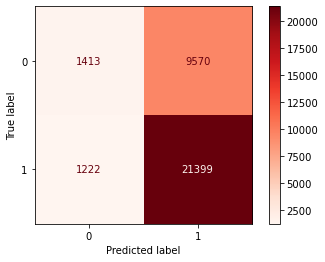

In [37]:
plot_confusion_matrix(dtc_rand_search, scaler_X_test, y_test,
                      cmap=plt.cm.Reds)
plt.show()

### Smote 

In [38]:
smote = SMOTE()

##### Model Train

In [39]:
X_train_resampled, y_train_resampled = smote.fit_resample(scaler_X_train, y_train) 

In [40]:
dtc_rand_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 60,
                                                      70],
                                        'min_samples_leaf': [1, 100, 200, 300,
                                                             400, 500],
                                        'min_samples_split': [5, 10, 20, 25, 30,
                                                              40, 50],
                                        'random_state': [1, 20, 42, 100]})

In [41]:
dtc_smote_pred_train = dtc_rand_search.predict(X_train_resampled)

In [42]:
print(classification_report(y_train_resampled, dtc_smote_pred_train, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.68      0.67      0.67     90231
       Delay       0.67      0.69      0.68     90231

    accuracy                           0.68    180462
   macro avg       0.68      0.68      0.68    180462
weighted avg       0.68      0.68      0.68    180462



In [43]:
print('Mean Absolute Error:', mean_absolute_error(y_train_resampled, dtc_smote_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train_resampled, dtc_smote_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train_resampled, dtc_smote_pred_train)))

Mean Absolute Error: 0.3209927851846926
Mean Squared Error: 0.3209927851846926
Root Mean Squared Error: 0.5665622518176556


##### Model Test

In [44]:
X_test_resampled, y_test_resampled = smote.fit_resample(scaler_X_test, y_test) 

In [45]:
dtc_smote_pred_test = dtc_rand_search.predict(X_test_resampled)

In [46]:
print(classification_report(y_test_resampled, dtc_smote_pred_test, target_names=['On Time', 'Delay']))

              precision    recall  f1-score   support

     On Time       0.65      0.62      0.63     22621
       Delay       0.63      0.66      0.65     22621

    accuracy                           0.64     45242
   macro avg       0.64      0.64      0.64     45242
weighted avg       0.64      0.64      0.64     45242



In [47]:
print('Mean Absolute Error:', mean_absolute_error(y_test_resampled, dtc_smote_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_resampled, dtc_smote_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_resampled, dtc_smote_pred_test)))

Mean Absolute Error: 0.3599973475973653
Mean Squared Error: 0.3599973475973653
Root Mean Squared Error: 0.5999977896603997


##### Confusion Matrix

In [48]:
cnf_matrix = confusion_matrix(y_test_resampled, dtc_smote_pred_test)
cnf_matrix

array([[13975,  8646],
       [ 7641, 14980]], dtype=int64)

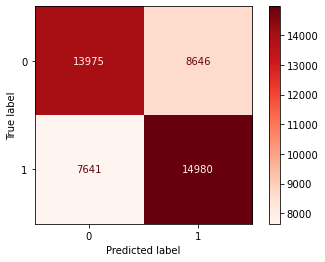

In [49]:
plot_confusion_matrix(dtc_rand_search, X_test_resampled, y_test_resampled,
                      cmap=plt.cm.Reds)
plt.show()

### Conclusion

Robust scaler does not appear to significantly affect the models. 